### Neural Network

In [88]:
import tensorflow as tf 
from tensorflow import keras
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

#### Read train and test data.

In [89]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Check first 5 records of the training data.

In [ ]:
train_data.head()

#### Separate x and y from train_data and x_test data from test_data.

In [90]:
x = train_data.iloc[:,1:785]
y = train_data.iloc[:,0]
x_test = test_data

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Separate x_train, x_val, y_train and y_val from x and y.

In [92]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x,y,test_size= 0.2,random_state=24)

#### Create and compile and fit the model.

In [94]:
model = keras.Sequential([
    keras.layers.Dense(700,input_shape=[784],activation='relu'),
    keras.layers.Dense(28,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

model.compile(
    optimizer='adam',
    loss= 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)

early_stopping = keras.callbacks.EarlyStopping(patience=5, min_delta=0.001, restore_best_weights=True)

history = model.fit(x_train,y_train,validation_data=(x_val,y_val) ,epochs=300,batch_size=3360,callbacks=early_stopping)

Epoch 1/300
10/10 [==============================] - 3s 202ms/step - loss: 19.4946 - accuracy: 0.1743 - val_loss: 2.1954 - val_accuracy: 0.1468
Epoch 2/300
10/10 [==============================] - 2s 162ms/step - loss: 2.1244 - accuracy: 0.1509 - val_loss: 2.0288 - val_accuracy: 0.1738
Epoch 3/300
10/10 [==============================] - 2s 160ms/step - loss: 2.0069 - accuracy: 0.1908 - val_loss: 1.9254 - val_accuracy: 0.2406
Epoch 4/300
10/10 [==============================] - 2s 184ms/step - loss: 1.8940 - accuracy: 0.2869 - val_loss: 1.8460 - val_accuracy: 0.3431
Epoch 5/300
10/10 [==============================] - 2s 249ms/step - loss: 1.8254 - accuracy: 0.3395 - val_loss: 1.8000 - val_accuracy: 0.3596
Epoch 6/300
10/10 [==============================] - 2s 226ms/step - loss: 1.7888 - accuracy: 0.3499 - val_loss: 1.7828 - val_accuracy: 0.3542
Epoch 7/300
10/10 [==============================] - 2s 174ms/step - loss: 1.7632 - accuracy: 0.3568 - val_loss: 1.7474 - val_accuracy: 0.372

#### Checck loss and accuracy of both training data and validation data.

In [95]:
history_df = pd.DataFrame(history.history)
history_df

,loss,accuracy,val_loss,val_accuracy
0,19.494650,0.174345,2.195439,0.146786
1,2.124398,0.150923,2.028815,0.173810
2,2.006863,0.190833,1.925351,0.240595
3,1.894004,0.286875,1.846034,0.343095
4,1.825381,0.339494,1.799971,0.359643
...,...,...,...,...
65,0.632665,0.755357,0.876768,0.735595
66,0.619753,0.747500,0.899274,0.727738
67,0.603407,0.739524,0.900910,0.732381
68,0.588059,0.738065,0.898377,0.723571


#### Plot accuracy of training and validation data.

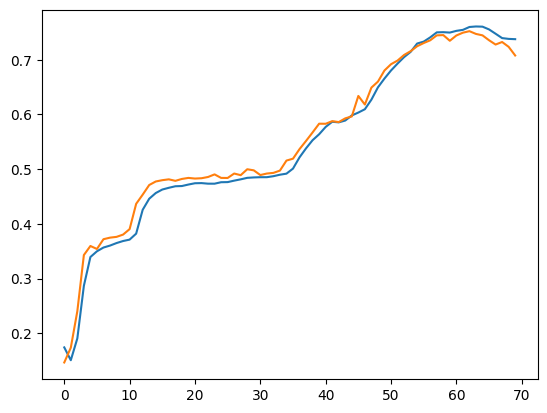

In [96]:
plt.figure()
plt.plot(history_df['accuracy'])
plt.plot(history_df['val_accuracy'])

#### Plot loss of training and validation data.

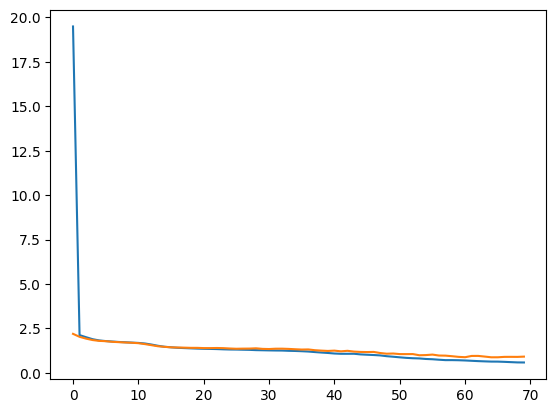

In [97]:
plt.figure()
plt.plot(history_df['loss'])
plt.plot(history_df['val_loss'])

#### Predict the label

In [98]:
y_pred = model.predict(x_test)

875/875 [==============================] - 3s 3ms/step


In [99]:
pred_digit = [np.argmax(i) for i in y_pred]
pred_digit

[2,
 0,
 4,
 4,
 3,
 7,
 0,
 3,
 0,
 3,
 3,
 7,
 9,
 0,
 4,
 3,
 3,
 1,
 9,
 0,
 9,
 1,
 8,
 3,
 7,
 4,
 2,
 7,
 9,
 7,
 7,
 3,
 4,
 2,
 3,
 2,
 3,
 3,
 1,
 3,
 7,
 7,
 4,
 9,
 8,
 7,
 8,
 8,
 3,
 1,
 3,
 8,
 8,
 3,
 8,
 2,
 1,
 2,
 2,
 7,
 4,
 1,
 7,
 0,
 0,
 0,
 1,
 9,
 0,
 1,
 3,
 3,
 8,
 8,
 2,
 8,
 3,
 9,
 2,
 8,
 3,
 9,
 1,
 0,
 9,
 2,
 4,
 3,
 3,
 7,
 2,
 0,
 3,
 3,
 1,
 4,
 3,
 9,
 7,
 4,
 0,
 3,
 2,
 0,
 7,
 3,
 0,
 3,
 0,
 8,
 3,
 0,
 4,
 7,
 1,
 7,
 1,
 1,
 3,
 8,
 3,
 7,
 2,
 8,
 3,
 3,
 8,
 7,
 8,
 4,
 3,
 3,
 3,
 0,
 0,
 0,
 3,
 1,
 3,
 3,
 9,
 3,
 4,
 3,
 3,
 8,
 7,
 7,
 2,
 8,
 0,
 3,
 3,
 3,
 3,
 3,
 7,
 3,
 7,
 8,
 3,
 0,
 4,
 3,
 1,
 3,
 7,
 3,
 3,
 0,
 2,
 7,
 3,
 3,
 1,
 3,
 7,
 7,
 1,
 2,
 4,
 8,
 3,
 2,
 4,
 9,
 2,
 1,
 3,
 0,
 3,
 1,
 4,
 9,
 3,
 0,
 9,
 7,
 3,
 9,
 1,
 9,
 0,
 9,
 9,
 0,
 8,
 4,
 3,
 2,
 0,
 9,
 3,
 3,
 8,
 2,
 1,
 3,
 3,
 4,
 2,
 3,
 1,
 0,
 2,
 3,
 4,
 3,
 1,
 0,
 0,
 4,
 9,
 1,
 7,
 3,
 2,
 3,
 8,
 3,
 8,
 3,
 2,
 8,
 3,
 3,
 4,
 8,
 3,
 3,


#### Make dataframe for submission file and convert it into csv file.

In [100]:
df = pd.DataFrame({'ImageId': x_test.index+1,'Label': pred_digit})
df.to_csv('NN.csv',index=False)